In [1]:
%%html

<script>
function hidecode() {
    x=document.getElementsByClassName("input");
    for (i = 0; i < x.length; i++) {
        x[i].style.display="none";
    }
    x=document.getElementsByClassName("output_stderr");
    for (i = 0; i < x.length; i++) {
        x[i].style.display="none";
    }
}
function showcode() {
    x=document.getElementsByClassName("input");
    for (i = 0; i < x.length; i++) {
        x[i].style.display="";
    }
    x=document.getElementsByClassName("output_stderr");
    for (i = 0; i < x.length; i++) {
        x[i].style.display="";
    }
}
</script>
<button class="button" onclick="hidecode()">Hide code</button>
<button class="button" onclick="showcode()">Show code</button>
<body onload="hidecode()">

Python for AI Engineer - Exercise 1 - EDA

Perform an EDA on Kaggle heart dataset (https://www.kaggle.com/ronitf/heart-disease-uci)

Include in your analysis the following topics:

- [ ] info
- [ ] describe
- [ ] corr
- [ ] plot
- [ ] normalization
- [ ] pca
- [ ] svd
- [ ] laplace transofrm
- [ ] data engineering
- [ ] outliers
- [ ] missing values
- [ ] train test split
- [ ] find interesting subgroups


I will address the above topics with the following sections:
1. Data loading
   (info, describe)
2. Data validation
   Separating the features to categorical and continuous
   (normalization, handling missing values)
3. Data preprocessing
   (PCA, SVD, laplace, outliers)
4. Data Engineering
   (one hot encoding, outliers, converting continuous to bins)
5. Analyzing  the subgroups and correlation between the categorical and continous features
6. Spliting the data test to train and test

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot


# Data loading

In [3]:
raw_df = pd.read_csv("heart.csv")

In [4]:
# Displaying the first 5 rows

raw_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Describing the dataset

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the info is seems that:
1. All the fields are **numeric** values,
2. There are no strings, datetime or object types
3. There are no null values
Thus we can perform numerical operation on them. 

# Data validation

## Getting a sense of the data
We will use
1. <code>describe</code> and <code>nunique</code>
2. Dataset description

In [6]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
raw_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## Data Validation

In [8]:
data_df = raw_df.copy()

### Remove duplicates

In [9]:
data_df.drop_duplicates(inplace=True)

number of duplicates found:

In [10]:
len(raw_df) - len(data_df)

1

### Match the features to the description

feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’

In [11]:
data_df[data_df.ca == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [12]:
data_df.loc[data_df.ca == 4, 'ca'] = np.NaN

Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN.

In [13]:
data_df[data_df.thal == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [14]:
data_df.loc[data_df.thal == 0, 'thal'] = np.NaN

### Handling invalid data

Lets use two methods of handling invalid rows:

Remove NaN thal values

In [15]:
data_df.dropna(subset=['thal'], inplace=True)

Replace NaN ca values

In [16]:
# Trying to find anothoer feature with high correlation to the ca

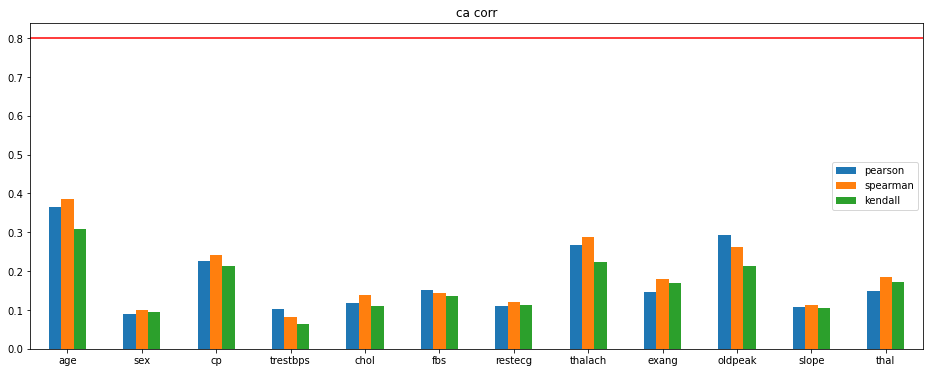

In [17]:
ca_pearson = data_df.corr('pearson')['ca'].drop(labels=['ca', 'target'])
ca_spearman = data_df.corr('spearman')['ca'].drop(labels=['ca', 'target'])
ca_kendall = data_df.corr('kendall')['ca'].drop(labels=['ca', 'target'])
ca_corr = { 'pearson': ca_pearson, 'spearman': ca_spearman, 'kendall': ca_kendall }
fig, ax = pyplot.subplots(figsize=(16,8))
plt.axhline(y=0.8, color='r', linestyle='-')
abs(pd.DataFrame(ca_corr)).plot(ax = ax, kind='bar', figsize=(16, 6), title = 'ca corr', rot=0);

No luck, since there is no clear correlation with any other feature lets replace with the most common ca value

In [18]:
most_common_ca = data_df.ca.value_counts().index[0]
data_df.fillna(most_common_ca, inplace=True)

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   sex       300 non-null    int64  
 2   cp        300 non-null    int64  
 3   trestbps  300 non-null    int64  
 4   chol      300 non-null    int64  
 5   fbs       300 non-null    int64  
 6   restecg   300 non-null    int64  
 7   thalach   300 non-null    int64  
 8   exang     300 non-null    int64  
 9   oldpeak   300 non-null    float64
 10  slope     300 non-null    int64  
 11  ca        300 non-null    float64
 12  thal      300 non-null    float64
 13  target    300 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.2 KB


based on the info, describe and data set description, lets classify the features to continuous and categorical

## Continuous Features

feature|Description|Type|Units|Min |Max
:------- |:---------             |:--- |:----  |:---|:---
age      |age                    | int | years |29  |77
trestbps | resting blood pressure| int | mm Hg | 94 |200
chol|serum cholestoral| int | mg/dl | 126 | 564
thalach | maximum heart rate achieved                        | int   | BPM | 71  | 202
oldpeak | ST depression induced by exercise relative to rest | float |  | 0.0 | 6.2
ca | number of major vessels | float |  | 0.0 | 3.0



## Categorical Features

feature  |Description                                    | 0   | 1   | 2   | 3          
:------- |:-------------------------------------         |:---- |:----|:----|:----
sex     | sex                                           | female| male
cp      | chest pain type                               | typical_angina | atypical_angina | non-anginal pain | asymtomatic
restecg | resting electrocardiographic results          | normal | ST-T wave abnormality| left ventricular hypertrophy
fbs     | fasting blood sugar > 120 mg/dl               | false | true   
exang   | exercise induced angina                       | no         | yes 
slope   | the slope of the peak exercise ST segment     |  upsloping | flat | downsloping
thal    | maximum heart rate achieved                   | | normal | fixed defect | reversable defect



**Disclaimer**: some of the units were not in the original post, so I looked around other kaggle projects,
    e.g. https://www.kaggle.com/raasik/heart-disease-beginner-eda-and-machine-learning

In [20]:
data_df['target'] = data_df.target.replace({1: "Disease", 0: "No_disease"}).astype("category")
data_df['sex'] = data_df.sex.replace({1: "Male", 0: "Female"}).astype("category")
data_df['cp'] = data_df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"}).astype("category")
data_df['restecg'] = data_df.restecg.replace({0: "Normal",
                                              1: "ST-T", 
                                              2:"left ventricular"}).astype("category")
data_df['exang'] = data_df.exang.replace({1: "Yes", 0: "No"}).astype("category")
data_df['fbs'] = data_df.fbs.replace({1: "True", 0: "False"}).astype("category")
data_df['slope'] = data_df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"}).astype("category")
data_df['thal'] = data_df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"}).astype("category")

Ploting a correlation matrix of the numerical values in the dataset

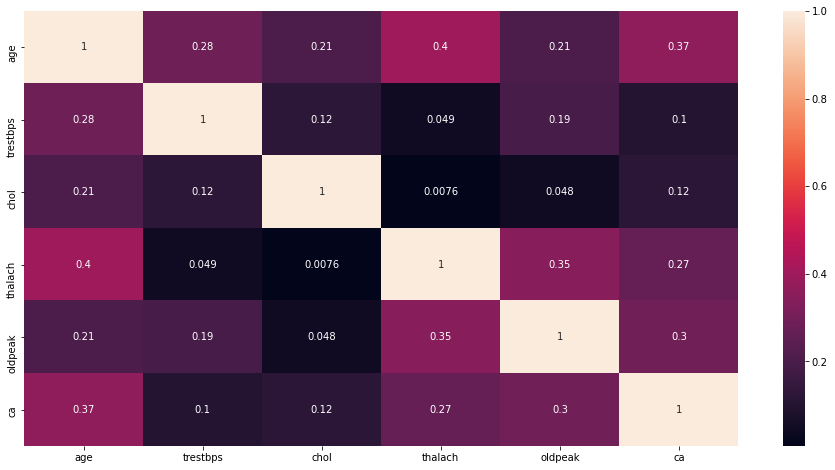

In [21]:
pyplot.subplots(figsize=(16,8))
sns.heatmap(abs(data_df._get_numeric_data().corr()), annot = True);

as we can see there is no strong correlation between the Continuous features

**one hot encoding**

In [22]:
cat_dummy_df = pd.get_dummies(data_df)

In [23]:
allCorr = abs(cat_dummy_df.corr()).unstack().sort_values()

In [24]:
allCorr[(allCorr < 0.999) & (allCorr > 0.7)]

slope_downsloping       slope_flat                0.869158
slope_flat              slope_downsloping         0.869158
thal_normal             thal_reversable_defect    0.883980
thal_reversable_defect  thal_normal               0.883980
restecg_ST-T            restecg_Normal            0.973680
restecg_Normal          restecg_ST-T              0.973680
dtype: float64

we can see that there is a strong correlation between some of the categorical features between themselves, but not
with other categorical features

# Data Preprocessing

### Outliers

Finding the outliers count for the numeric features

In [25]:
numeric_data = data_df._get_numeric_data()
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

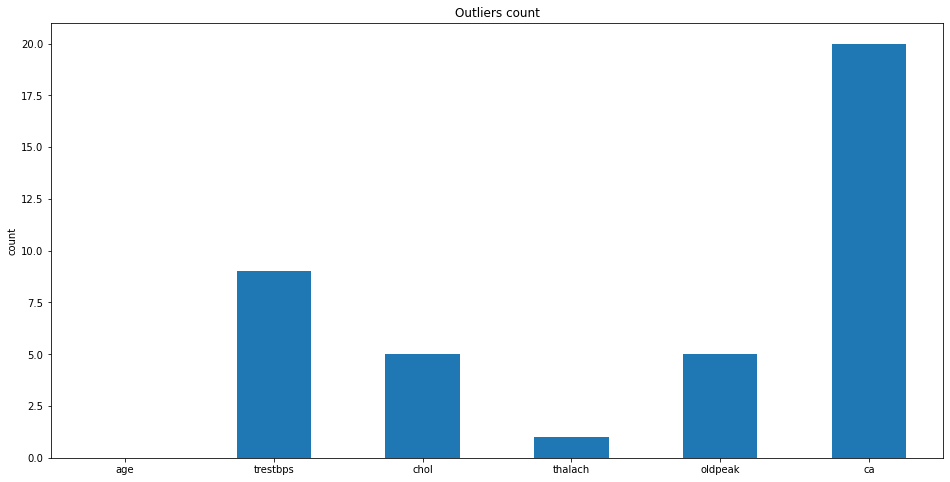

In [26]:
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

outliers.plot(kind='bar', title='Outliers count', figsize=(16,8), ylabel = 'count', rot = 0);

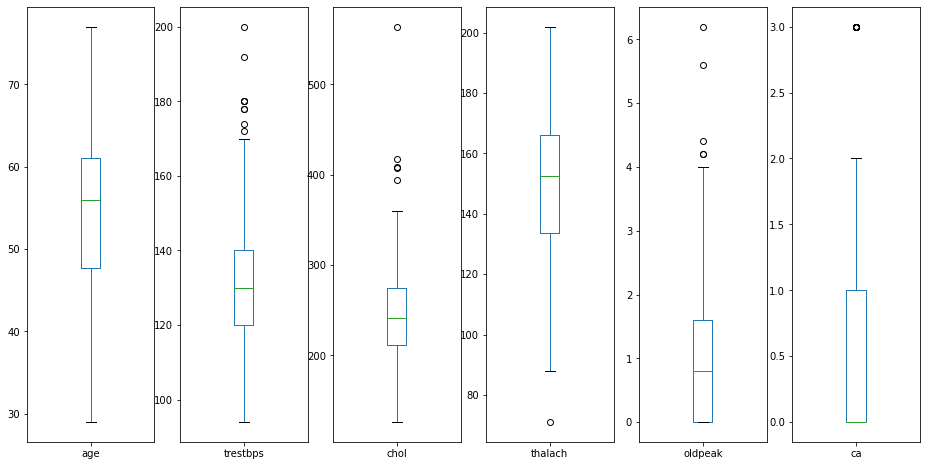

In [27]:
numeric_data.plot(kind='box', subplots=True, sharey=False, figsize=(16,8));

In [28]:
# Removing the outliers

# normalize the df using Z score to normal distribution
# keep the entries under 1.5

from scipy import stats

z_scores = stats.zscore(numeric_data)
abs_z_scores = np.abs(z_scores)
keep_entries = (abs_z_scores < 1.5).all(axis=1)
numeric_wo_outliers = numeric_data[keep_entries]

In [29]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       300 non-null    int64  
 1   trestbps  300 non-null    int64  
 2   chol      300 non-null    int64  
 3   thalach   300 non-null    int64  
 4   oldpeak   300 non-null    float64
 5   ca        300 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 16.4 KB


Removing the outliers

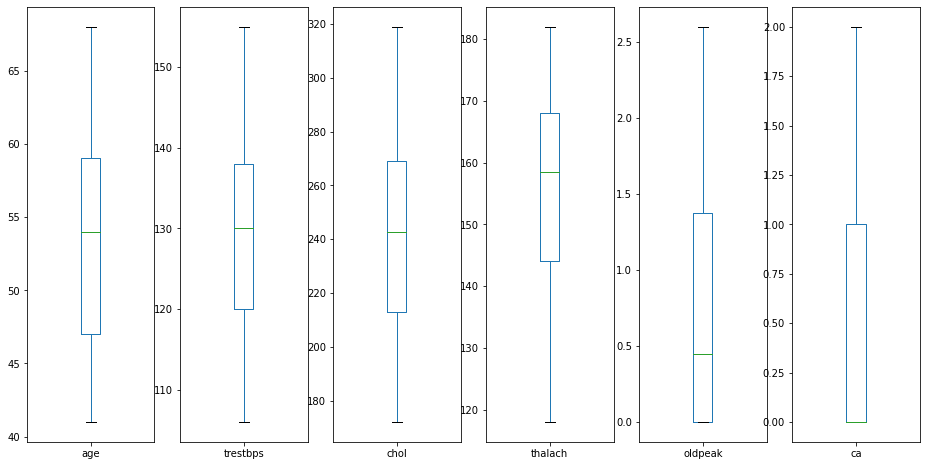

In [30]:
numeric_wo_outliers.plot(kind='box', subplots=True, sharey=False, figsize=(16,8));

# Data Preprocessing

## Reducing dimension using SVD

In [31]:
# https://www.kaggle.com/lorenzodenisi/svd-decomposition-and-applications

In [32]:
from numpy import linalg

def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

In [33]:
# reducing parameters to k = 2

k = 2

A = numeric_data.values

U, S, Vt = svd(A)

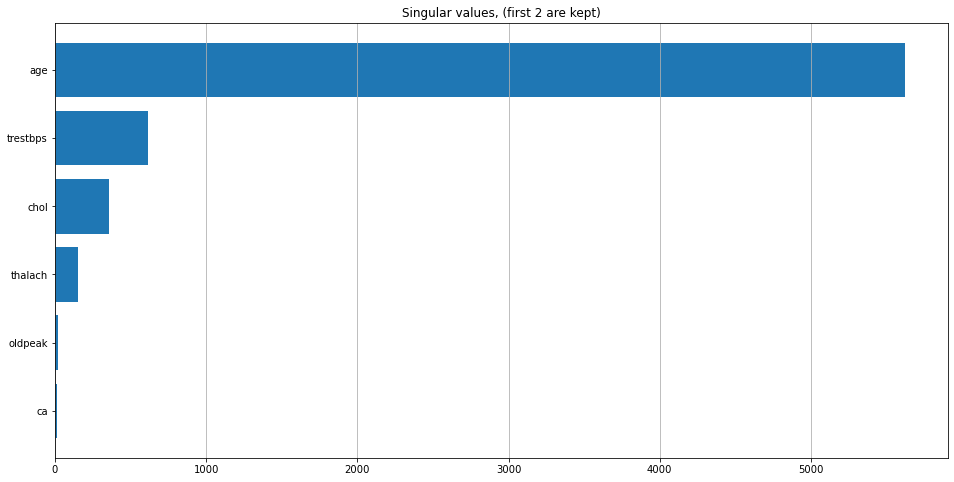

In [34]:
plt.figure(figsize=(16,8))
plt.barh(numeric_data.columns[::-1], S[::-1])
plt.title(f"Singular values, (first {k} are kept)")
plt.gca().xaxis.grid(True)

It seems that the SVD didn't separate well the samples

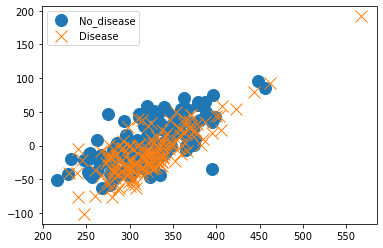

In [35]:
# plot the linear combination of the features using SVD

U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)

reduced_data['target'] = data_df.target

# groups = reduced_data.groupby('target')

# Plot
fig, ax = plt.subplots()

ax.plot(reduced_data[reduced_data.target == "No_disease"][0], reduced_data[reduced_data.target == "No_disease"][1], 
       marker='o', linestyle='', ms=12, label="No_disease")
ax.plot(reduced_data[reduced_data.target == "Disease"][0], reduced_data[reduced_data.target == "Disease"][1], 
       marker='x', linestyle='', ms=12, label="Disease")
ax.legend()

plt.show()

## Reducing dimension using PCA

In [36]:
data_for_pca = numeric_data.copy()

In [37]:
data_for_pca.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0.0
1,37,130,250,187,3.5,0.0
2,41,130,204,172,1.4,0.0
3,56,120,236,178,0.8,0.0
4,57,120,354,163,0.6,0.0


In [38]:
from sklearn import preprocessing

scaled_data = preprocessing.scale(data_for_pca)

In [39]:
from sklearn.decomposition import PCA
pca = PCA()

In [40]:
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

In [41]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
pc_labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

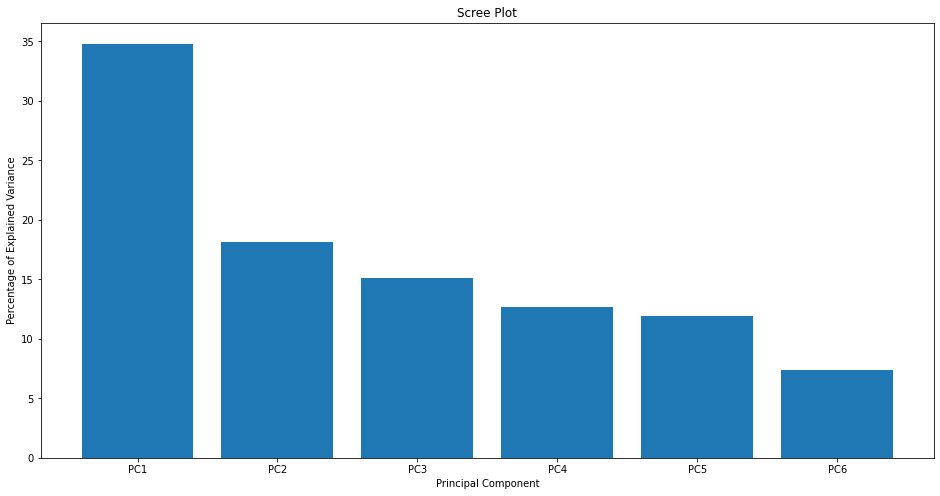

In [42]:
plt.figure(figsize=(16,8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=pc_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

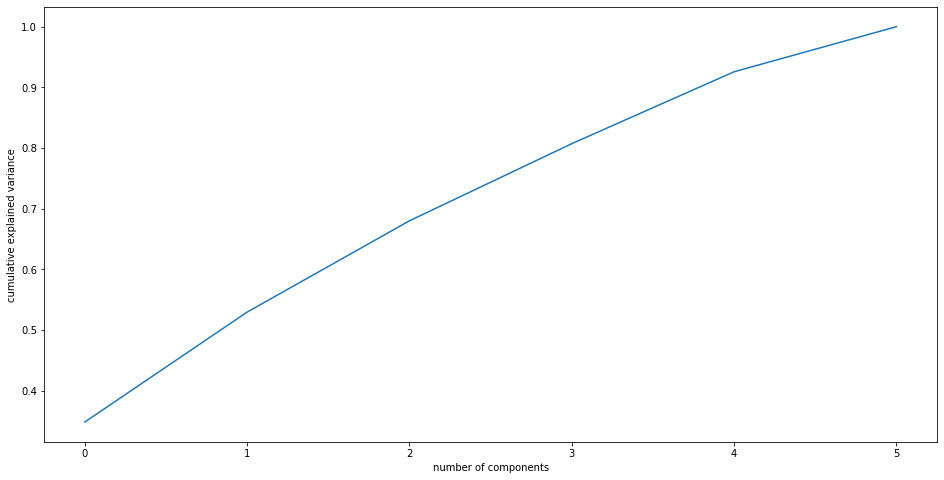

In [43]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The PCA shows that the component variation is approximately the same and its hard to use to reduce the dimensions.

Finding the most varied features

In [44]:


loading_scores = pd.Series(pca.components_[0], index=data_for_pca.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores.index.values

array(['age', 'ca', 'thalach', 'oldpeak', 'trestbps', 'chol'],
      dtype=object)

## Performing laplace transform python

Lets choose one of the categorical data with an non-uniform distribution

<AxesSubplot:title={'center':'Target Counts'}, xlabel='restecg'>

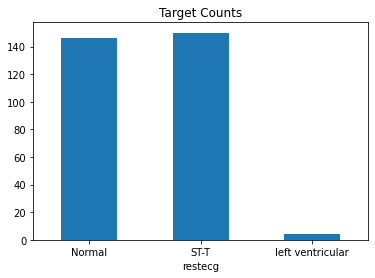

In [45]:
data_df.groupby('restecg').count()['target'].plot(kind='bar', title='Target Counts', rot=0)

In [46]:
def laplce_smoothing(data, a, K):
    return (data + a) / (data.sum() + K*a)

In [47]:
restacg_before_lap = data_df.groupby('restecg').count()['target']

In [48]:
restacg_df = pd.DataFrame()
restacg_df['OriginalData'] = restacg_before_lap
restacg_df['AfterLaplace a=50, K=1'] = laplce_smoothing(restacg_before_lap, a = 50 , K = 1) * restacg_before_lap.sum()
restacg_df['AfterLaplace, a=50, K=2'] = laplce_smoothing(restacg_before_lap, a = 50 , K = 2) * restacg_before_lap.sum()
restacg_df['AfterLaplace, a=25, K=1'] = laplce_smoothing(restacg_before_lap, a = 25 , K = 1) * restacg_before_lap.sum()
restacg_df['AfterLaplace, a=25, K=2'] = laplce_smoothing(restacg_before_lap, a = 25 , K = 2) * restacg_before_lap.sum()

<AxesSubplot:xlabel='restecg'>

<Figure size 1152x576 with 0 Axes>

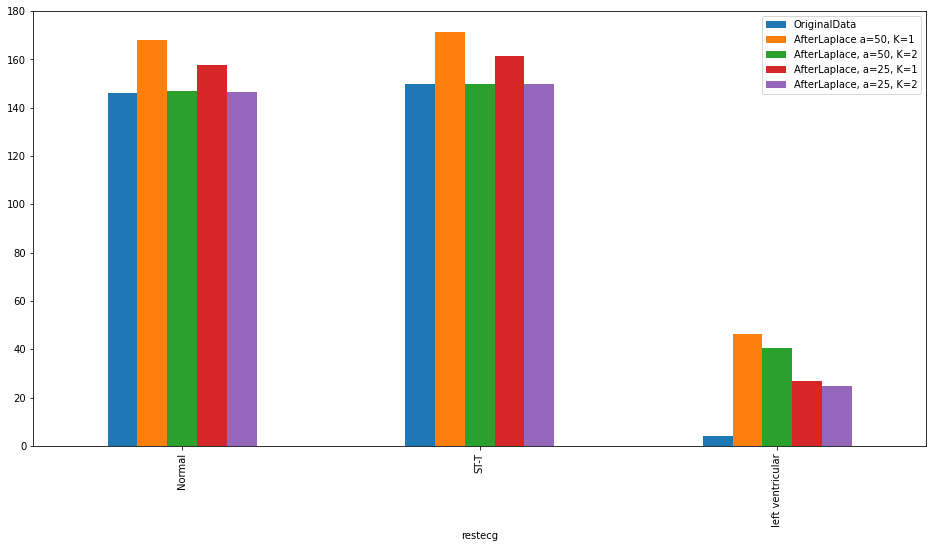

In [49]:
plt.figure(figsize=(16,8))
restacg_df.plot(kind='bar', figsize=(16,8))

we can see that using K=2, increases the restacg 2, while maintating the 0 and 1 samples of 1 and 2 the same. using
diffrent a, controls of how much restacg 2 will increase.

# Data Engineering

Lets convert some of the continuous features to "categorical" using bins

<AxesSubplot:ylabel='target'>

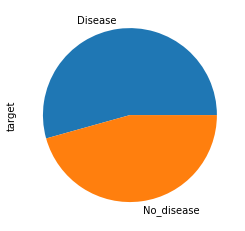

In [50]:
data_df.target.value_counts(normalize=True).plot(kind='pie')

<AxesSubplot:ylabel='sex'>

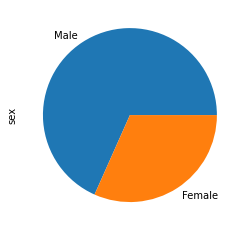

In [51]:
data_df.sex.value_counts(normalize=True).plot(kind='pie')

In [52]:
age_labels = ["20-30","30-40","40-50","50-60", "60-70", "70-80", "80-90", "90+"]
data_df['age_bins'] = pd.cut(data_df.age,bins=[20,30,40,50,60,70,80,90,120], labels=age_labels)

In [53]:
hr_labels = ["60-80","80-100","100-120","120-140","140-160", "160-180", "180-200", "200-220"]
data_df['hr_bins'] = pd.cut(data_df.thalach,bins=[60,80,100,120,140,160,180,200, 220], labels=hr_labels)

## Plot all categorical features

In [54]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'thal']

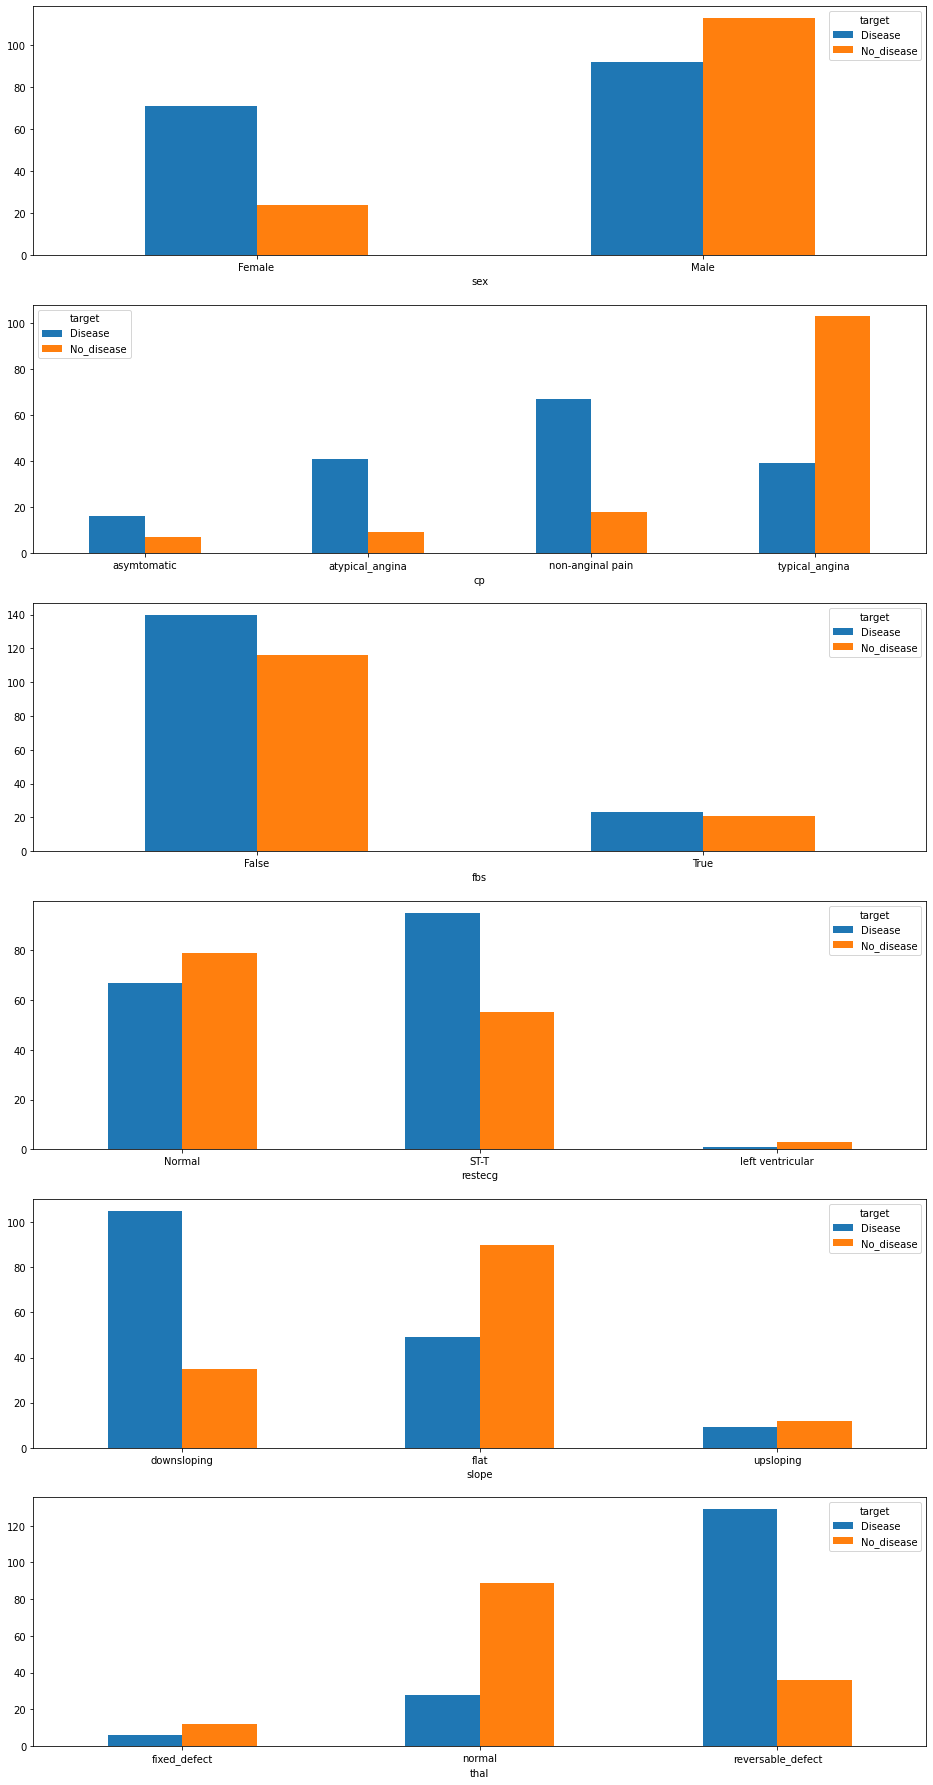

In [55]:
fig, axs = plt.subplots(len(categorical), 1)
for value, cat in enumerate(categorical):
    data_to_plot = data_df.groupby(by=[cat, 'target'])['target'].count().unstack().plot(
        kind='bar',
        ax = axs[value],
        figsize = (16,32),
        rot=0);

**Categorical** insights:
The following conditions may lead to greater cause of disease:
1. Being a female (sex)
2. Having a non-anigal pain (cp)
3. Having a st-t (restacg)
4. Having a donwsloping (slope)
5. Having a reverseble defect (thal)

The fbs feature doesn't seem to have any infulence

## Plot all numerical features

In [56]:
numeric_data.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0.0
1,37,130,250,187,3.5,0.0
2,41,130,204,172,1.4,0.0
3,56,120,236,178,0.8,0.0
4,57,120,354,163,0.6,0.0


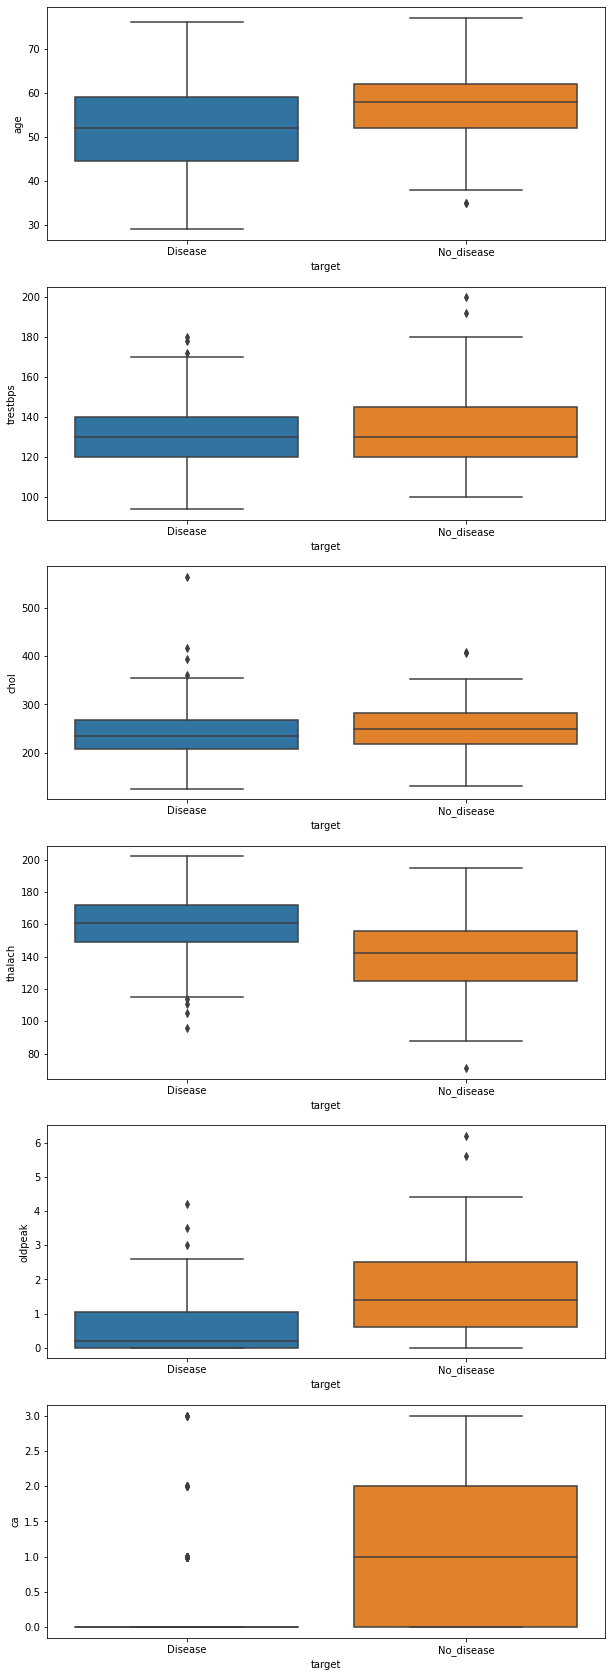

In [57]:
fig, axs = plt.subplots(len(numeric_data.columns), 1, figsize=(10,30))

for value, numeric_col in enumerate(numeric_data.columns):
    sns.boxplot(x=data_df['target'], y=data_df[numeric_col], ax = axs[value]);
    

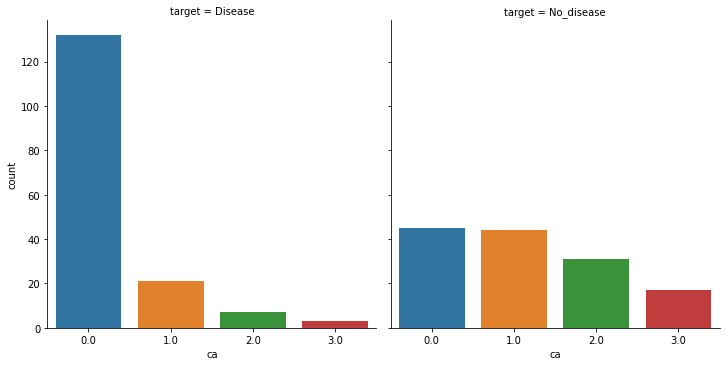

In [58]:
# Lets explore more the ca feature
sns.catplot(x='ca', col='target', kind='count', data=data_df);

**Numerical** Insights:

The following conditions may lead to greater cause of disease:
1. Higher thalach (around 160)
2. Low Oldpeak
3. ca equals to zero

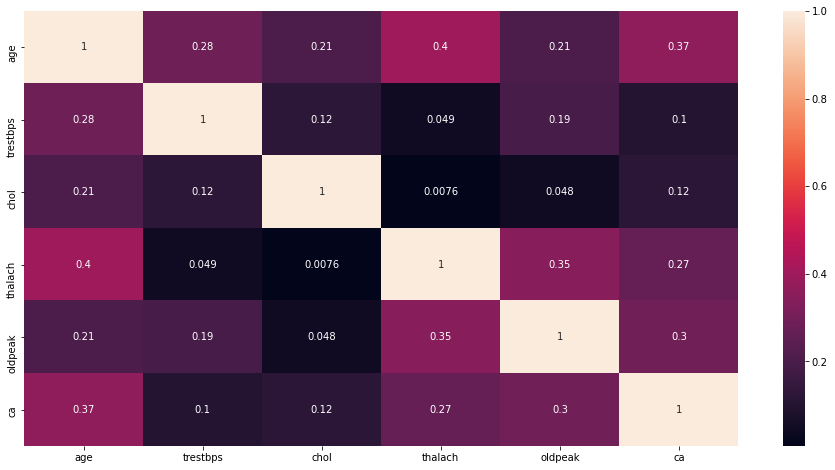

In [59]:
# Now the correlation only uses the numerical features
fig, ax = pyplot.subplots(figsize=(16,8))
sns.heatmap(abs(data_df.corr()), ax = ax, annot = True);

**Numerical** correlations insights:
There isn't a strong relation between the different numerical values, the highest was 0.4

In [60]:
## Train split test
from sklearn.model_selection import train_test_split

Split the data into train and test using
<code>X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)</code>

In [61]:
X = data_df._get_numeric_data()
y = data_df.target

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Lets check if the target is in the same proporotion on the train and test datasets

In the train dataset:

In [63]:
y_train.value_counts(normalize=True)

Disease       0.555556
No_disease    0.444444
Name: target, dtype: float64

In the test dataset:

In [64]:
y_test.value_counts(normalize=True)

Disease       0.506667
No_disease    0.493333
Name: target, dtype: float64

In [65]:
len(y_test) / (len(y_train) + len(y_test))

0.25

# Intersting subgroups

In [66]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       300 non-null    int64   
 1   sex       300 non-null    category
 2   cp        300 non-null    category
 3   trestbps  300 non-null    int64   
 4   chol      300 non-null    int64   
 5   fbs       300 non-null    category
 6   restecg   300 non-null    category
 7   thalach   300 non-null    int64   
 8   exang     300 non-null    category
 9   oldpeak   300 non-null    float64 
 10  slope     300 non-null    category
 11  ca        300 non-null    float64 
 12  thal      300 non-null    category
 13  target    300 non-null    category
 14  age_bins  300 non-null    category
 15  hr_bins   300 non-null    category
dtypes: category(10), float64(2), int64(4)
memory usage: 29.2 KB


<AxesSubplot:xlabel='thalach', ylabel='thal'>

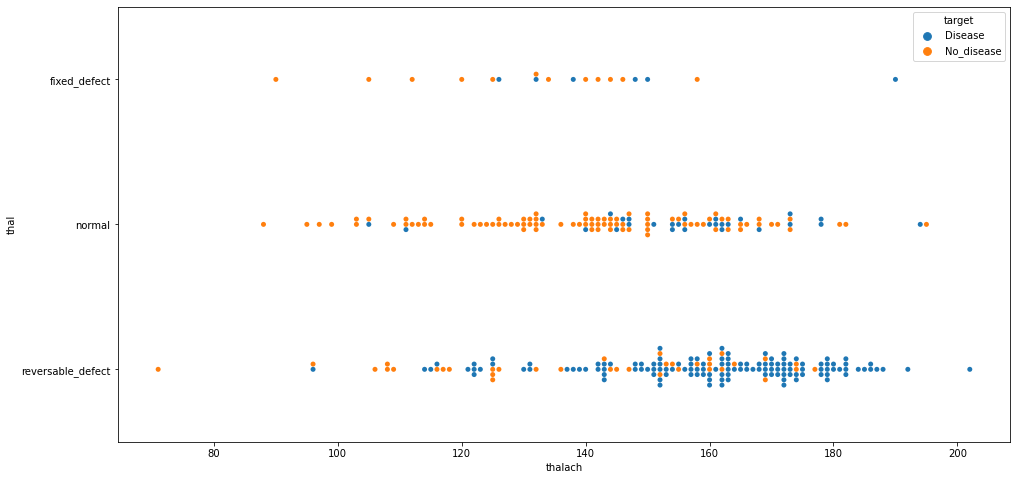

In [67]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='thalach',y='thal', data=data_df, hue='target')

If we look on the most distinctive numerical and categorical features, it seems the most common group are 
patients with reversible defect with maximum heart rate over 180

<AxesSubplot:xlabel='age_bins', ylabel='thal'>

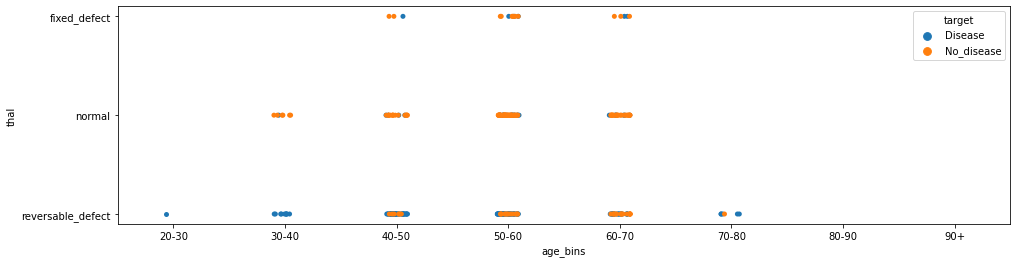

In [68]:
plt.figure(figsize=(16,4))
sns.stripplot(x='age_bins',y='thal', data=data_df, hue='target')

eventough there is a strong correlation between reversiable defect and being sick, it happens mostly on ages under 50 or above 70

<AxesSubplot:xlabel='hr_bins', ylabel='thal'>

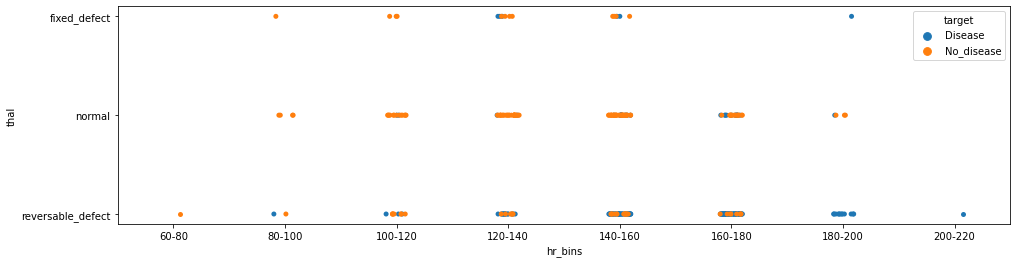

In [69]:
plt.figure(figsize=(16,4))
sns.stripplot(x='hr_bins',y='thal', data=data_df, hue='target')

also concerning maximum heart rate, the higher the heart rate, the more likely you are to be sick, if you have a
reversible defect

# Conclusions

1. The dataset was complete, without null values, and numeric
2. There were 6 continuous features and 7 numeric features
3. There were some discrepancies between the site description and the actual values
4. The dataset is almost balance <code>target</code> wise
5. The dataset has more male patients then female patients in the <code>sex</code> feature
6. The <code>chol</code> and <code>trestbps</code> hardly affect the target
7. The <code>thal</code> feature is correlated with the target especially on higher <code>restacg</code> rates
8. The <code>ca</code> was classified as continuous feature but maybe it can be also a categorical feature
9. The PCA/SVD techinques didn't help reducing the diementsion.